Start your notebook here:

Total records: 1512
Total records: 1512


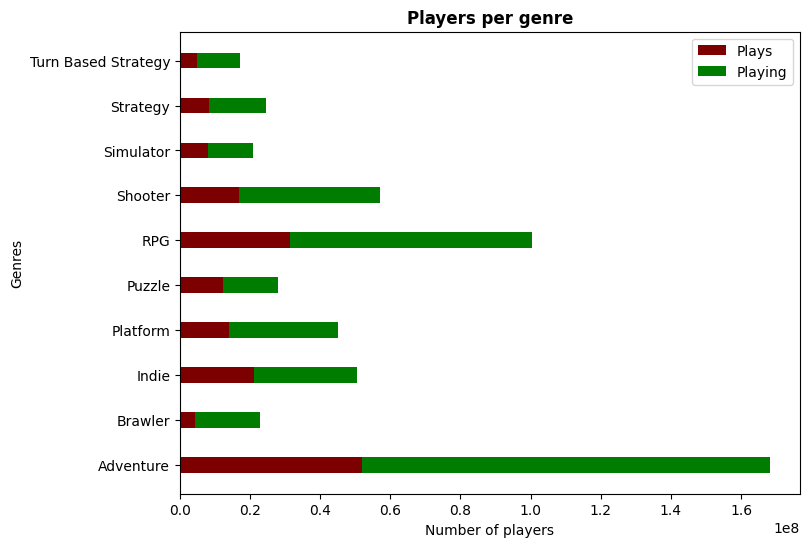

In [59]:
import sys
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

filepath = "../games.csv"
data = pd.read_csv(filepath, index_col=0)

# Show missing values
total_null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
print("Total records:", data.shape[0])
missing_data = pd.concat([total_null, percent.round(2)], axis=1, keys=["Total missing", "%"])
missing_data

# Replacing misssing values by mean data
mean_reating = data["Rating"].mean()
data["Rating"] = data["Rating"].replace(np.nan, mean_reating)
data["Team"] = data["Team"].replace(np.nan, "['Unknown team']")
data["Summary"] = data["Summary"].replace(np.nan, "Unknown summary")

# Show missing values
total_null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
print("Total records:", data.shape[0])
missing_data = pd.concat([total_null, percent.round(2)], axis=1, keys=["Total missing", "%"])
missing_data

# Show duplicates
duplicates = data[data.duplicated()]
duplicates.head()

# Drop duplicates
data = data.drop_duplicates()

# TBC converteren naar de datum van vandaag
dt = datetime.now()
dt_str = dt.strftime("%b %d, %Y")
data["Release Date"] = data["Release Date"].str.replace("releases on TBD", dt_str)

# Kolom Release data converteren naar Datums
data["Release Date"] = pd.to_datetime(data["Release Date"])

# Kolommen toevoegen voor weekdag, dag, maand en jaar
data["Weekdag"] = data["Release Date"].dt.day_name()
data["Dag"] = data["Release Date"].dt.day
data["Maand"] = data["Release Date"].dt.strftime("%b")
data["Jaar"] = data["Release Date"].dt.year

# Andere kolommen naar numerieke waardes converteren
data["Times Listed"] = data["Times Listed"].str.replace("K", "").astype(float)*1000
data["Number of Reviews"] = data["Number of Reviews"].str.replace("K", "").astype(float)*1000
data["Plays"] = data["Plays"].str.replace("K", "").astype(float)*1000
data["Playing"] = data["Playing"].str.replace("K", "").astype(float)*1000
data["Backlogs"] = data["Backlogs"].str.replace("K", "").astype(float)*1000
data["Wishlist"] = data["Wishlist"].str.replace("K", "").astype(float)*1000

# Verschillende rijen (met dezelfde index) voor als een team uit meerdere personen bestaat
data["Team"] = data["Team"].apply(lambda x: ast.literal_eval(x))
df_team = pd.DataFrame({
    "Title": data["Title"].tolist(),
    "Team": data["Team"].tolist()
})
df_team = df_team.explode("Team")

# Idem voor genres
data["Genres"] = data["Genres"].apply(lambda x: ast.literal_eval(x))
df_genres = pd.DataFrame({
    "Title": data["Title"].tolist(),
    "Genres": data["Genres"].tolist()
})
df_genres = df_genres.explode("Genres")

# Histrogram per rating
top_rating = data[["Title", "Rating"]].sort_values(by = "Rating", ascending= False)
#sns.histplot(data = data["Rating"])
#plt.show()

# Histogram opsplitsen per genre (meerdere genres per game mogelijk)
list_genres = pd.DataFrame(df_genres["Genres"])
#count_genres = list_genres.value_counts().plot(kind="bar")

# Taartdiagram per genre
#count_genres = list_genres.value_counts().plot(kind="pie")
genre_counts = pd.DataFrame(list_genres.value_counts().rename_axis("Unique values"))
genre_counts

#plot = genre_counts.plot(kind = "pie", labels = None, y = "count", figsize=(10,10))

# Shortlist van de genres
shortlist_genres = pd.DataFrame(list_genres.value_counts().head(10))
#shortlist_plot = list_genres.value_counts().head(10).plot(kind="pie")
#shortlist_genres

# Bivariate analyse (relatie tussen 2 variabelen)
plays_genre_df = pd.DataFrame({
    "Title": data["Title"].tolist(),
    "Genres": data["Genres"].tolist(),
    "Plays": data["Plays"].tolist(),
    "Playing": data["Playing"].tolist()
})

plays_genre_df = plays_genre_df.explode("Genres")
top_10_genres = ['Adventure','RPG','Shooter','Platform','Indie','Puzzle','Strategy','Brawler','Simulator','Turn Based Strategy']
plays_genre_df = plays_genre_df.groupby("Genres")[["Plays", "Playing"]].sum().reset_index()
plays_genre_df = plays_genre_df.loc[plays_genre_df["Genres"].isin(top_10_genres)]
#plays_genre_df

# Horizintale bar maken
index = plays_genre_df["Genres"].tolist()
value1 = plays_genre_df["Plays"].tolist()
value2 = plays_genre_df["Playing"].tolist()
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.35
bar1 = ax.barh(index, value1, bar_width, label="Plays", color="#7c0000")
bar2 = ax.barh(index, value2, bar_width, left=value1, label="Playing", color="#007c00")
ax.set_xlabel("Number of players")
ax.set_ylabel("Genres")
ax.set_title("Players per genre", fontweight="bold")
ax.legend(loc="upper right")

plt.show()